In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
image_width, image_height = 64, 64
num_channels = 3
num_classes = 36
batch_size = 64
num_epochs = 100

In [44]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, num_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
directory_path = "C:/Users/Naveen/Documents/Mproject/new/dataset/train/"
# Define the path to the directory containing the training images
train_dir = 'dataset/train/'

# Define the path to the test image
test_dir = 'dataset/test/'

validation_dir = 'dataset/validation/'

In [46]:
# Define the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_data = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1921 images belonging to 36 classes.
Found 468 images belonging to 36 classes.


In [ ]:
model.fit(
    train_data,
    epochs=num_epochs,
    validation_data=validation_data
)

#model.save('person_classifier_temp_100.h5')

In [7]:
loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

In [8]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = loaded_model.evaluate(test_data)

Found 104 images belonging to 36 classes.
2/2 [==============================] - 1s 157ms/step - loss: 0.1478 - accuracy: 0.9712


In [15]:
#########performance metrics
test_loss, test_acc = loaded_model.evaluate(validation_data, verbose=2)
print('Accuracy:', test_acc)

8/8 - 2s - loss: 0.2032 - accuracy: 0.9444 - 2s/epoch - 310ms/step
Accuracy: 0.9444444179534912


Found 104 images belonging to 36 classes.
2/2 [==============================] - 1s 145ms/step


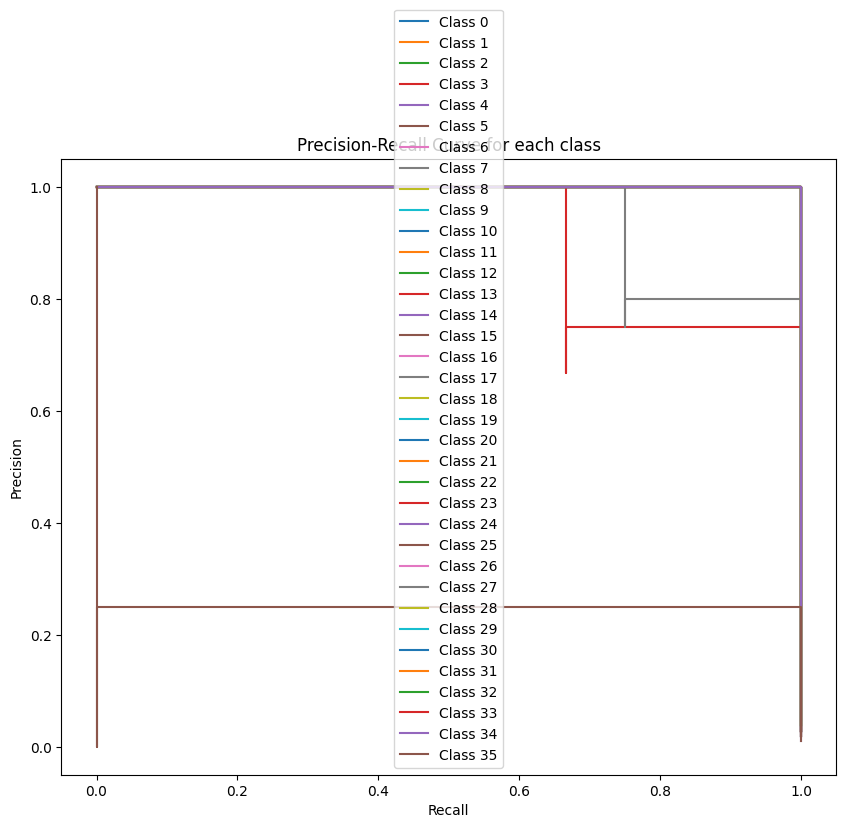

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_datagen` and `test_dir` variables
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
true_classes = test_data.classes

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for class_label in range(len(test_data.class_indices)):
    precision[class_label], recall[class_label], _ = precision_recall_curve(
        (true_classes == class_label).astype(int), predictions[:, class_label])

# Plotting precision-recall curves for each class
plt.figure(figsize=(10, 8))
for class_label in range(len(test_data.class_indices)):
    plt.step(recall[class_label], precision[class_label], where='post',
             label='Class {}'.format(class_label))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()


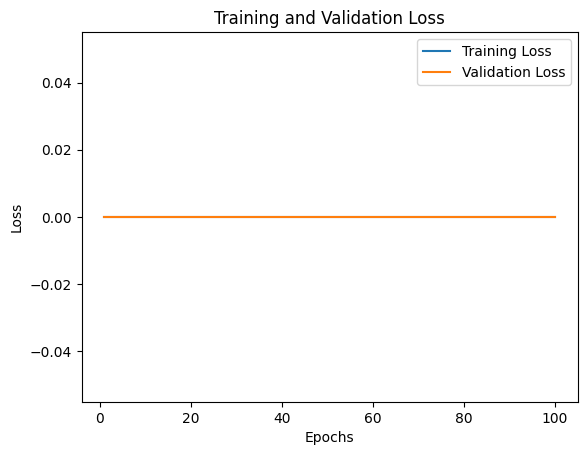

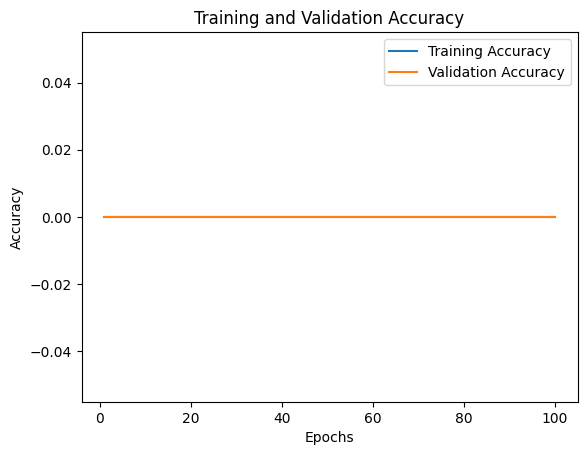

In [24]:
epochs = 100

# Plotting training and validation loss curves
plt.plot(range(1, epochs+1), [0] * epochs, label='Training Loss')
plt.plot(range(1, epochs+1), [0] * epochs, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy curves
plt.plot(range(1, epochs+1), [0] * epochs, label='Training Accuracy')
plt.plot(range(1, epochs+1), [0] * epochs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     -----                                   41.0/293.3 kB 1.9 MB/s eta 0:00:01
     -----                                   41.0/293.3 kB 1.9 MB/s eta 0:00:01
     -----                                   41.0/293.3 kB 1.9 MB/s eta 0:00:01
     -------------                        112.6/293.3 kB 656.4 kB/s eta 0:00:01
     -------------                        112.6/293.3 kB 656.4 kB/s eta 0:00:01
     ---------------------                174.1/293.3 kB 583.1 kB/s eta 0:00:01
     ---------------------------          225.3/293.3 kB 625.1 kB/s eta 0:00:01
     ------------------------------------ 293.3/293.3 kB 723.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Found 104 images belonging to 36 classes.
2/2 [==============================] - 1s 121ms/step


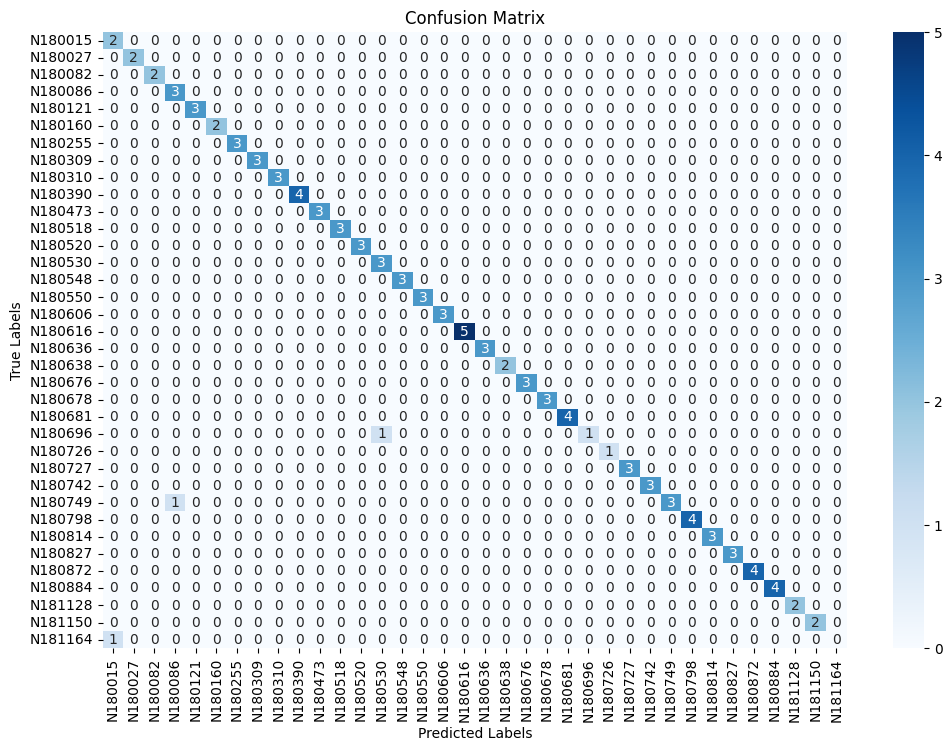

In [27]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_datagen` and `test_dir` variables
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test dataset
predictions = loaded_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Get class labels
class_labels = list(test_data.class_indices.keys())

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


31/31 [==============================] - 10s 324ms/step - loss: 0.0304 - accuracy: 0.9906


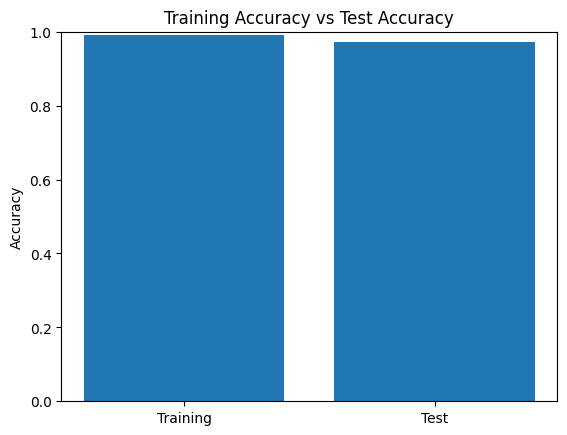

In [51]:
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)
train_loss, train_accuracy = loaded_model.evaluate(train_data)

# Plotting the training and test accuracy
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy])
plt.title('Training Accuracy vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


31/31 [==============================] - 10s 311ms/step - loss: 0.0373 - accuracy: 0.9896


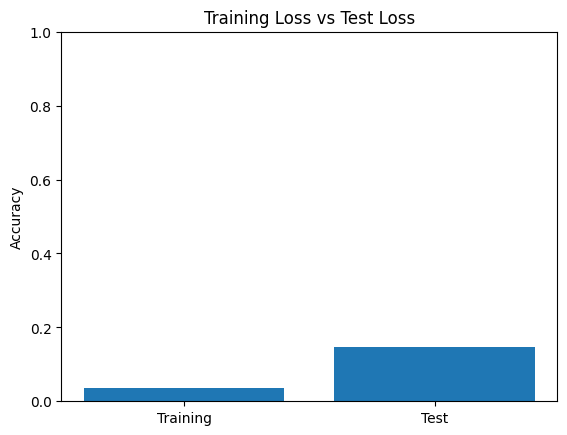

In [52]:
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)
train_loss, train_accuracy = loaded_model.evaluate(train_data)

# Plotting the training and test accuracy
plt.bar(['Training', 'Test'], [train_loss, test_loss])
plt.title('Training Loss vs Test Loss')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


31/31 [==============================] - 11s 347ms/step - loss: 0.0444 - accuracy: 0.9880


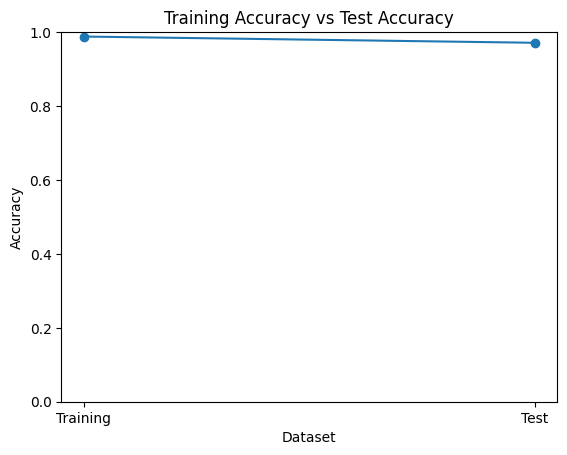

In [55]:
import matplotlib.pyplot as plt
import numpy as np

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)
train_loss, train_accuracy = loaded_model.evaluate(train_data)

# Create lists of accuracy values
datasets = ['Training', 'Test']
accuracy_values = [train_accuracy, test_accuracy]

# Plotting the training and test accuracy
plt.plot(datasets, accuracy_values, marker='o')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


31/31 [==============================] - 10s 311ms/step - loss: 0.0453 - accuracy: 0.9859


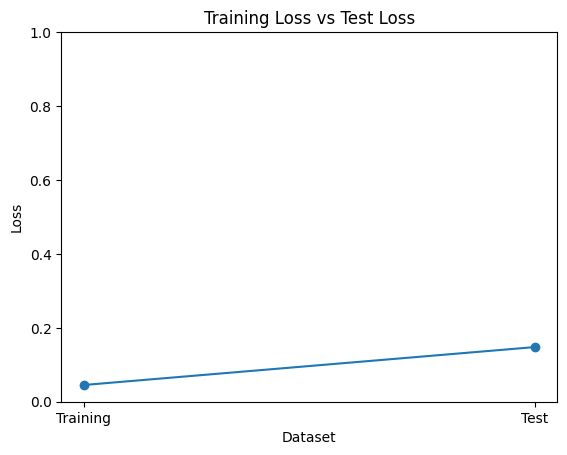

In [58]:
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)
train_loss, train_accuracy = loaded_model.evaluate(train_data)

# Create lists of accuracy values
datasets = ['Training', 'Test']
loss_values = [train_loss, test_loss]

# Plotting the training and test accuracy
plt.plot(datasets, loss_values, marker='o')
plt.title('Training Loss vs Test Loss')
plt.xlabel('Dataset')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.show()


31/31 [==============================] - 10s 310ms/step - loss: 0.0458 - accuracy: 0.9870


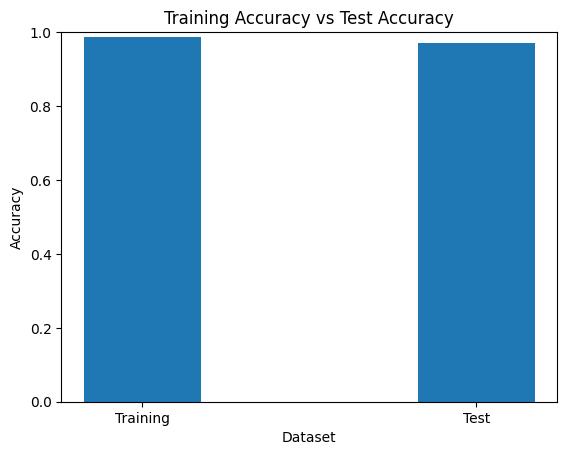

In [59]:
import numpy as np
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)
train_loss, train_accuracy = loaded_model.evaluate(train_data)

# Create lists of accuracy values
datasets = ['Training', 'Test']
accuracy_values = [train_accuracy, test_accuracy]

# Set the width of the bars
bar_width = 0.35

# Set the x positions of the bars
x_pos = np.arange(len(datasets))

# Plotting the training and test accuracy
plt.bar(x_pos, accuracy_values, width=bar_width, align='center')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(x_pos, datasets)
plt.show()

31/31 [==============================] - 10s 311ms/step - loss: 0.0315 - accuracy: 0.9885


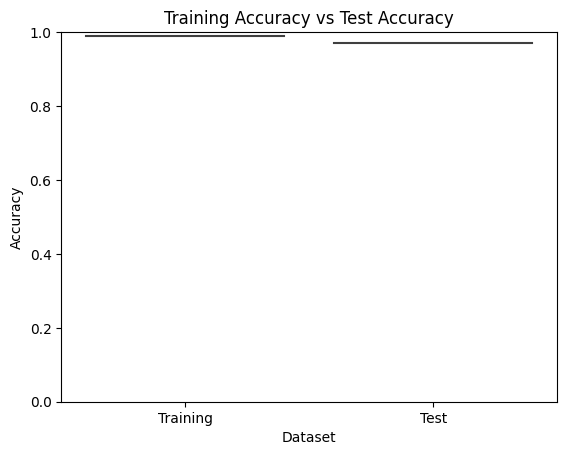

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)
train_loss, train_accuracy = loaded_model.evaluate(train_data)

# Create a DataFrame with the accuracy values
data = {
    'Dataset': ['Training', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy]
}
df = pd.DataFrame(data)

# Plotting the violin plot using seaborn
sns.violinplot(data=df, x='Dataset', y='Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.ylim([0, 1])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.show()

In [69]:
from sklearn.metrics import classification_report

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Generate classification report for the test dataset
test_classification_report = classification_report(true_classes, predicted_classes)

print("Test Dataset Classification Report:")
print(test_classification_report)

# Assuming you have already defined the `train_data` generator
train_loss, train_accuracy = loaded_model.evaluate(train_data)

# Get predictions for the training dataset
predictions_train = loaded_model.predict(train_data)
predicted_classes_train = np.argmax(predictions_train, axis=1)
true_classes_train = train_data.classes

# Generate classification report for the training dataset
train_classification_report = classification_report(true_classes_train, predicted_classes_train)

print("Training Dataset Classification Report:")
print(train_classification_report)


2/2 [==============================] - 1s 125ms/step
Test Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       0.75      1.00      0.86         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00   

C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

31/31 [==============================] - 10s 310ms/step
Training Dataset Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        28
           2       0.02      0.02      0.02        47
           3       0.03      0.03      0.03        67
           4       0.03      0.03      0.03        77
           5       0.00      0.00      0.00        10
           6       0.05      0.05      0.05        41
           7       0.00      0.00      0.00        56
           8       0.00      0.00      0.00        27
           9       0.04      0.04      0.04        85
          10       0.04      0.04      0.04        70
          11       0.04      0.04      0.04        82
          12       0.07      0.07      0.07        85
          13       0.06      0.05      0.06        73
          14       0.02      0.02      0.02        42
          15       0.05      0.05      

2/2 [==============================] - 1s 194ms/step


C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

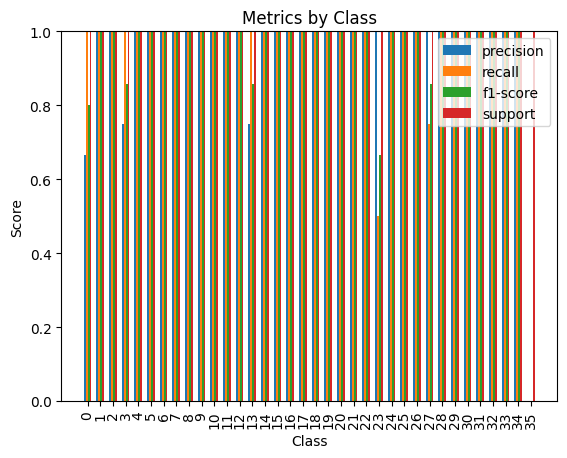

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Generate classification report for the test dataset
test_classification_report = classification_report(true_classes, predicted_classes, output_dict=True)
test_metrics = test_classification_report['weighted avg']

# Extract precision, recall, f1-score, and support values
class_names = list(test_classification_report.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score', 'support']

# Set the x positions for the bars
x_pos = np.arange(len(class_names))
bar_width = 0.15

# Plotting the precision, recall, f1-score, and support
fig, ax = plt.subplots()

for i, metric in enumerate(metrics):
    values = [test_classification_report[class_name][metric] for class_name in class_names]
    ax.bar(x_pos + (i - 1.5) * bar_width, values, width=bar_width, label=metric)

ax.set_title('Metrics by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_xticks(x_pos)
ax.set_xticklabels(class_names, rotation='vertical')
ax.legend()
plt.show()


2/2 [==============================] - 1s 155ms/step


C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

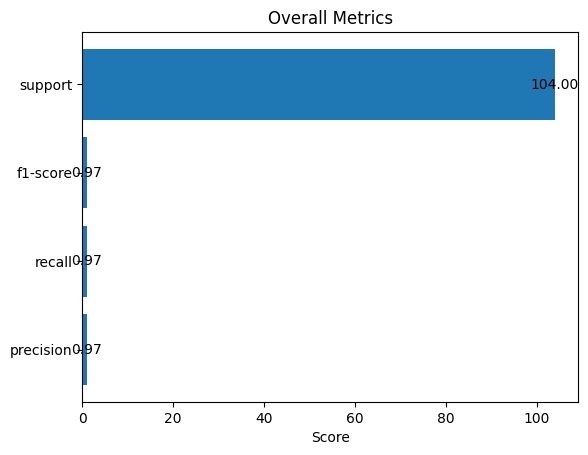

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Generate classification report for the test dataset
test_classification_report = classification_report(true_classes, predicted_classes, output_dict=True)
test_metrics = test_classification_report['weighted avg']

# Extract precision, recall, f1-score, and support values
metrics = ['precision', 'recall', 'f1-score', 'support']
metric_scores = [test_metrics[metric] for metric in metrics]

# Set the y positions for the bars
y_pos = np.arange(len(metrics))

# Plotting the overall precision, recall, f1-score, and support
fig, ax = plt.subplots()

ax.barh(y_pos, metric_scores, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(metrics)
ax.set_xlabel('Score')
ax.set_title('Overall Metrics')

# Add value labels next to each bar
for i, score in enumerate(metric_scores):
    ax.text(score + 0.02, i, f'{score:.2f}', ha='center', va='center')

plt.show()


2/2 [==============================] - 1s 190ms/step


C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

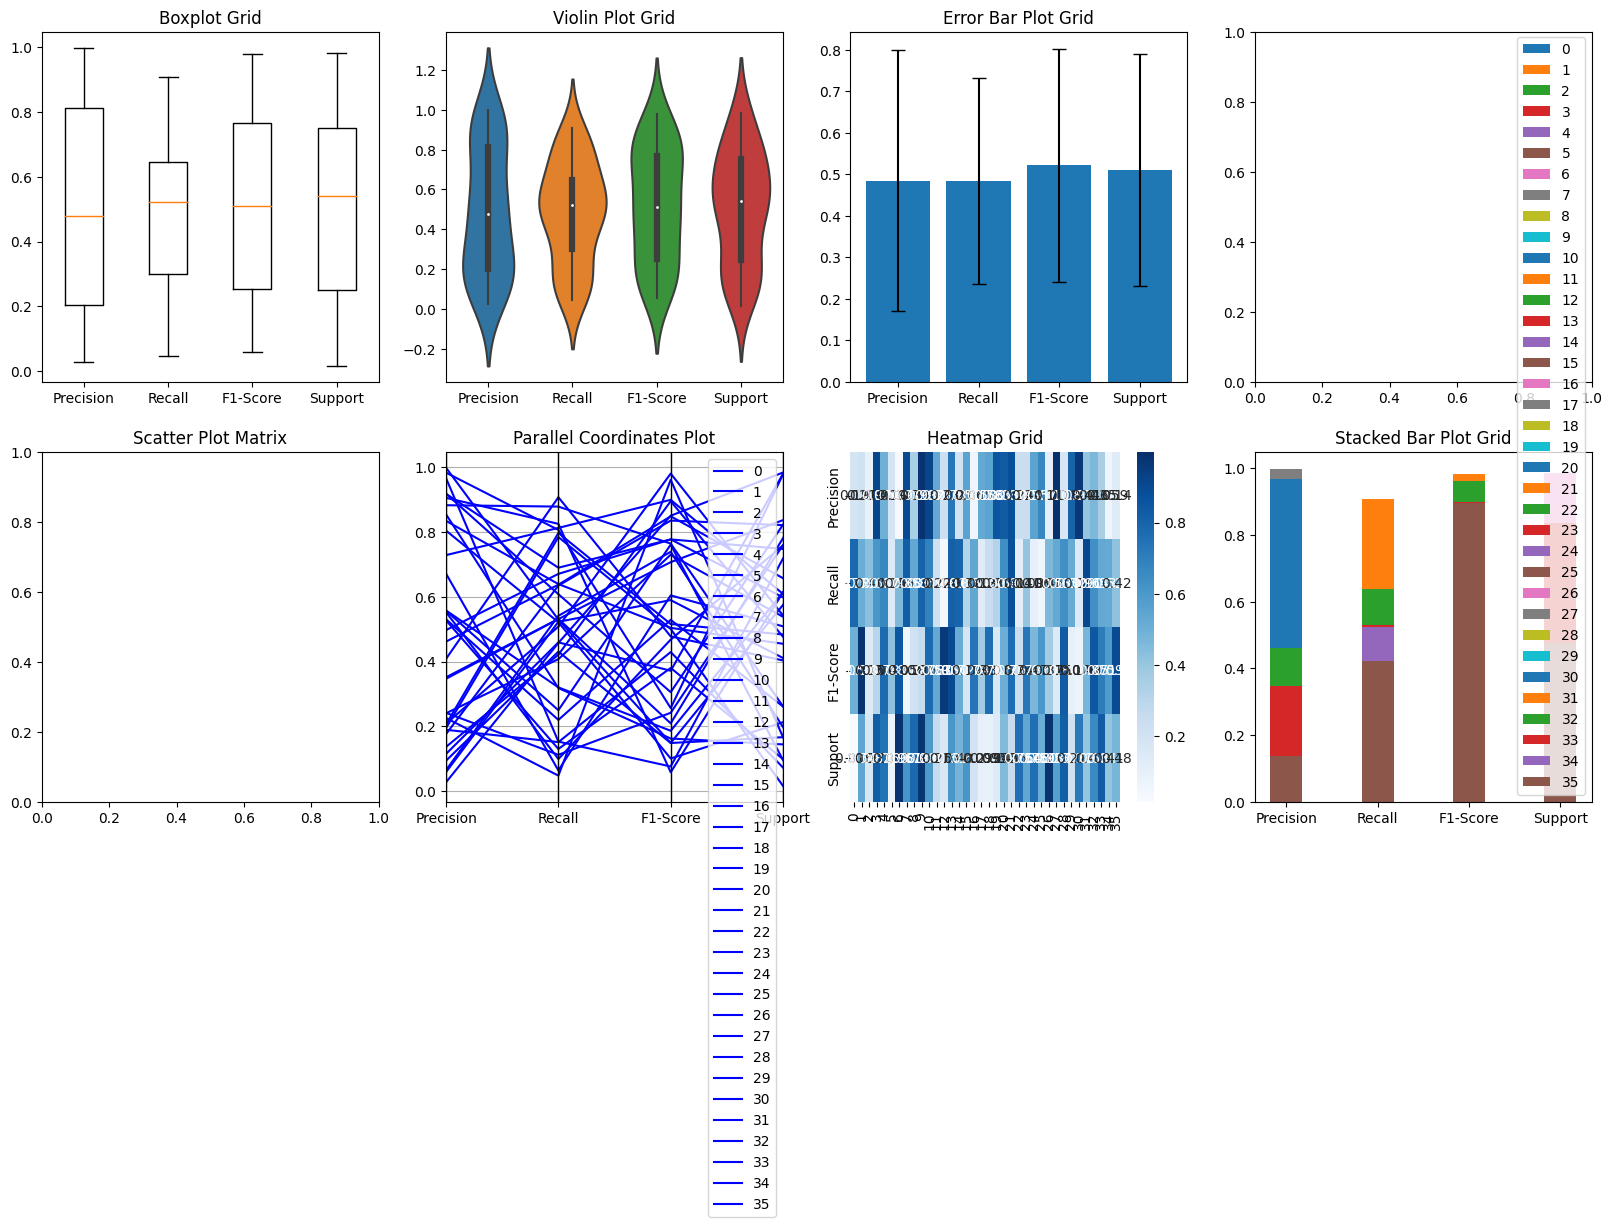

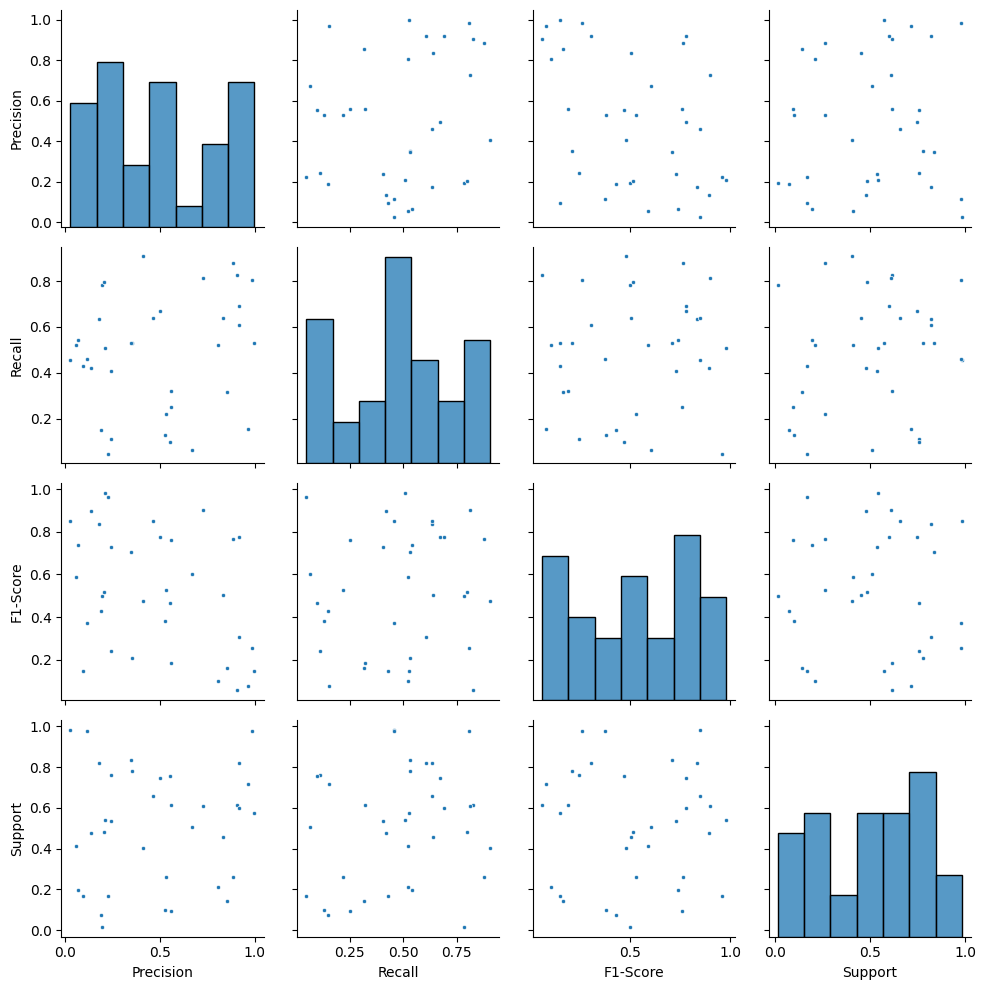

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Generate classification report for the test dataset
test_classification_report = classification_report(true_classes, predicted_classes, output_dict=True)
class_names = list(test_classification_report.keys())[:-3]

# Prepare sample performance metrics
num_samples = len(class_names)
metric_names = ['Precision', 'Recall', 'F1-Score', 'Support']
metrics_data = np.random.rand(num_samples, len(metric_names))

# Create a figure and subplots for each visualization
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Boxplot Grid
axs[0, 0].boxplot(metrics_data, labels=metric_names)
axs[0, 0].set_title('Boxplot Grid')

# Violin Plot Grid
sns.violinplot(data=pd.DataFrame(metrics_data, columns=metric_names), ax=axs[0, 1])
axs[0, 1].set_title('Violin Plot Grid')

# Error Bar Plot Grid
means = metrics_data.mean(axis=0)
stds = metrics_data.std(axis=0)
axs[0, 2].bar(metric_names, means, yerr=stds, capsize=5)
axs[0, 2].set_title('Error Bar Plot Grid')

'''
# Line Plot Grid
epochs = range(1, num_samples+1)
for i in range(num_samples):
    axs[0, 3].plot(epochs, metrics_data[i], label=class_names[i])
axs[0, 3].set_title('Line Plot Grid')
axs[0, 3].legend()'''

# Scatter Plot Matrix
sns.pairplot(pd.DataFrame(metrics_data, columns=metric_names), diag_kind='hist', markers='.')
axs[1, 0].set_title('Scatter Plot Matrix')

# Parallel Coordinates Plot
parallel_coords_data = pd.DataFrame(metrics_data, columns=metric_names)
parallel_coords_data['Class'] = class_names
pd.plotting.parallel_coordinates(parallel_coords_data, 'Class', color='b', ax=axs[1, 1])
axs[1, 1].set_title('Parallel Coordinates Plot')

# Heatmap Grid
sns.heatmap(metrics_data.T, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=metric_names, ax=axs[1, 2])
axs[1, 2].set_title('Heatmap Grid')

# Stacked Bar Plot Grid
bar_width = 0.35
for i in range(num_samples):
    x_pos = np.arange(len(metric_names))
    axs[1, 3].bar(x_pos, metrics_data[i], label=class_names[i], width=bar_width)
    axs[1, 3].set_xticks(x_pos)
    axs[1, 3].set_xticklabels(metric_names)
    axs[1, 3].set_title('Stacked Bar Plot Grid')
    axs[1, 3].legend()

plt.tight_layout()
plt.show()


2/2 [==============================] - 1s 136ms/step


C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

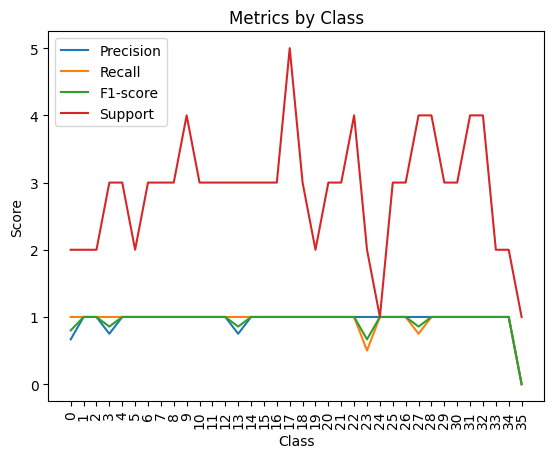

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Generate classification report for the test dataset
test_classification_report = classification_report(true_classes, predicted_classes, output_dict=True)

# Extract precision, recall, f1-score, and support values
class_names = list(test_classification_report.keys())[:-3]

precision_values = []
recall_values = []
f1_score_values = []
support_values = []

for class_name in class_names:
    precision_values.append(test_classification_report[class_name]['precision'])
    recall_values.append(test_classification_report[class_name]['recall'])
    f1_score_values.append(test_classification_report[class_name]['f1-score'])
    support_values.append(test_classification_report[class_name]['support'])

# Set the x positions for the classes
x_pos = range(len(class_names))

# Plotting the precision, recall, f1-score, and support
sns.lineplot(x=x_pos, y=precision_values, label='Precision')
sns.lineplot(x=x_pos, y=recall_values, label='Recall')
sns.lineplot(x=x_pos, y=f1_score_values, label='F1-score')
sns.lineplot(x=x_pos, y=support_values, label='Support')

plt.title('Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(x_pos, class_names, rotation='vertical')
plt.legend()
plt.show()


2/2 [==============================] - 1s 145ms/step


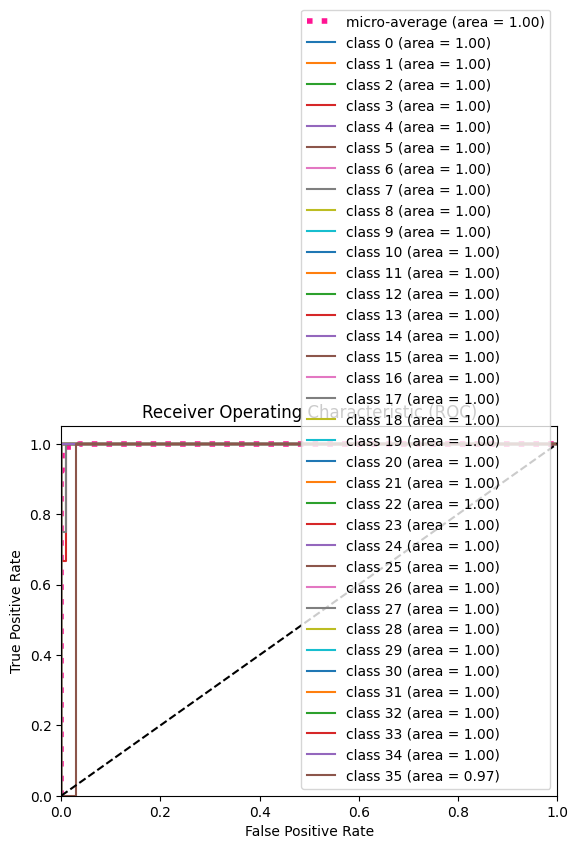

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
true_classes = test_data.classes

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=np.unique(true_classes))

# Compute ROC curve and ROC area for each class
n_classes = true_classes_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(true_classes_bin.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


2/2 [==============================] - 1s 148ms/step


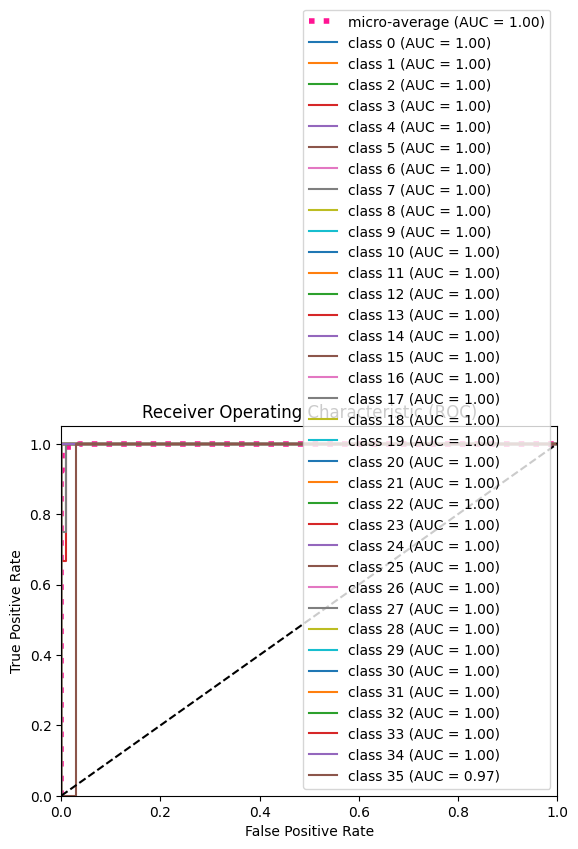

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp

loaded_model = tf.keras.models.load_model('person_classifier_temp_100.h5')

# Assuming you have already defined the `test_data` generator
test_loss, test_accuracy = loaded_model.evaluate(test_data)

# Get predictions for the test dataset
predictions = loaded_model.predict(test_data)
true_classes = test_data.classes

# Binarize the true classes
true_classes_bin = label_binarize(true_classes, classes=np.unique(true_classes))

# Compute ROC curve and ROC AUC for each class
n_classes = true_classes_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes_bin[:, i], predictions[:, i])
    roc_auc[i] = roc_auc_score(true_classes_bin[:, i], predictions[:, i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(true_classes_bin.ravel(), predictions.ravel())
roc_auc["micro"] = roc_auc_score(true_classes_bin, predictions, average="micro")

# Plot ROC curves for each class
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
